=== Comprehensive Model Results Analysis - XGBoost vs LSTM vs STGCN Comparison ===

1. Loading all model results...
Loading XGBoost results...
Loaded 4 XGBoost models
Loading LSTM results...
Loaded 4 LSTM models
Loading STGCN results...
Loaded 8 STGCN models

2. Calculating performance metrics...

=== Model Performance Comparison ===
                            Model    Type   Version Graph_Type    MAE      R²   RMSE    MAPE  samples
    XGBoost v1: Original Features XGBoost version_1        N/A 0.1015 -0.0313 0.1286 21.7325      665
    XGBoost v2: + Infection Rates XGBoost version_2        N/A 0.0895  0.1673 0.1155 20.1088      665
   XGBoost v3: + Derived Features XGBoost version_3        N/A 0.0492  0.7675 0.0610 10.3315      665
     XGBoost v4: + Socio-Economic XGBoost version_4        N/A 0.0479  0.7836 0.0589 10.1714      665
       LSTM v1: Original Features    LSTM version_1        N/A 0.1673 -1.7375 0.2094 31.3336      665
       LSTM v2: + Infection Rates    LSTM version_2 

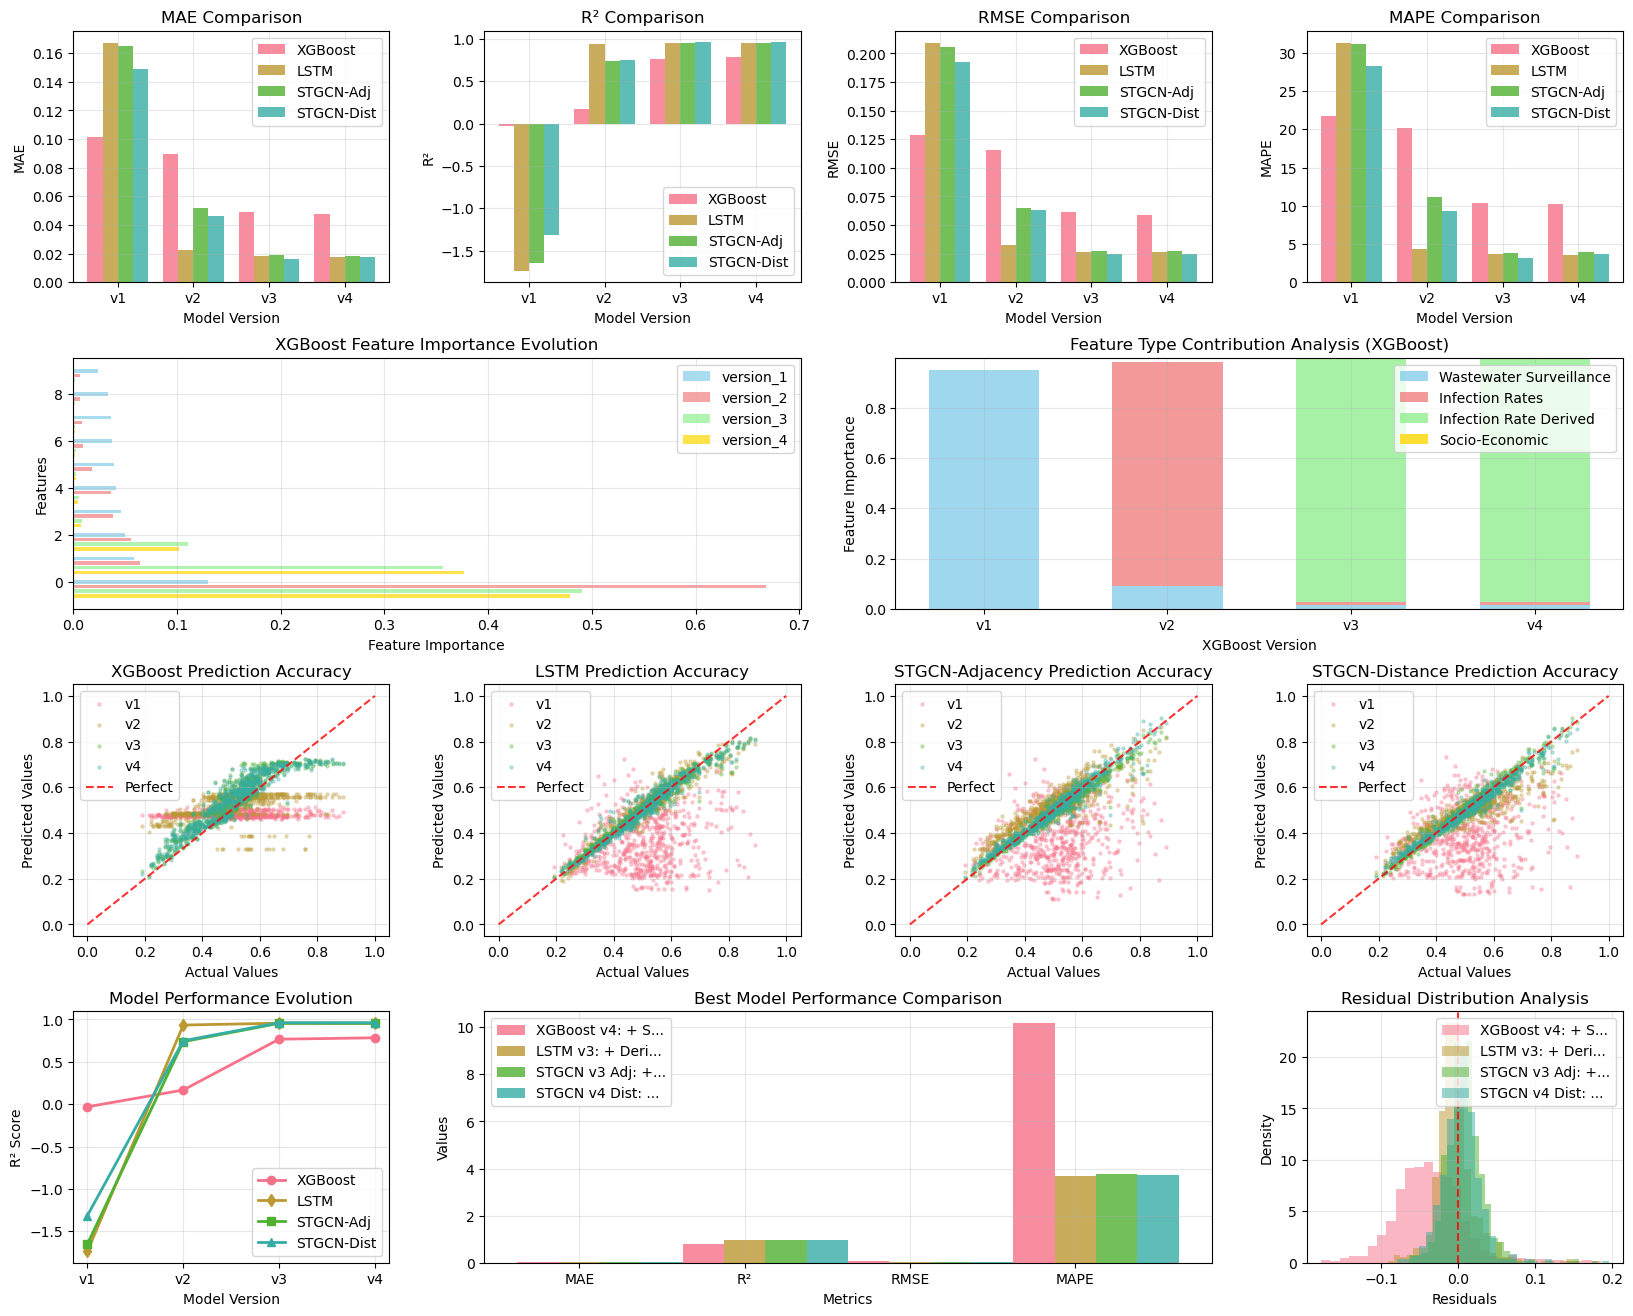


4. Detailed Analysis Report...

=== Model Improvement Analysis ===
XGBoost Model Improvement:

XGBoost v2: + Infection Rates vs Baseline:
  MAE improvement: +11.9%
  R² improvement: -634.4%
  RMSE improvement: +10.1%

XGBoost v3: + Derived Features vs Baseline:
  MAE improvement: +51.5%
  R² improvement: -2551.3%
  RMSE improvement: +52.5%

XGBoost v4: + Socio-Economic vs Baseline:
  MAE improvement: +52.9%
  R² improvement: -2602.8%
  RMSE improvement: +54.2%

=== STGCN Graph Type Comparison ===
version_1: Adjacency R²=-1.6510, Distance R²=-1.3151
version_2: Adjacency R²=0.7377, Distance R²=0.7493
version_3: Adjacency R²=0.9548, Distance R²=0.9618
version_4: Adjacency R²=0.9542, Distance R²=0.9619

=== XGBoost Feature Analysis ===

XGBoost v1: Original Features:
  Daily contribution:
    Day-1: 0.0519
    Day-2: 0.1035
    Day-3: 0.1453
    Day-4: 0.1345
    Day-5: 0.1479
    Day-6: 0.1234
    Day-7: 0.2935
  Most important feature: sars_cov2_gc_l_mean_day_minus_7 (0.1303)

XGBoost v

In [1]:
##### Comprehensive Model Results Analysis - XGBoost vs LSTM vs STGCN Comparison

print("=== Comprehensive Model Results Analysis - XGBoost vs LSTM vs STGCN Comparison ===")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy import stats
import os
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("\n1. Loading all model results...")

def calculate_metrics(predictions_df):
    """Calculate model performance metrics"""
    actual = predictions_df['actual']
    predicted = predictions_df['predicted']
    
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    return {
        'MAE': mae,
        'R²': r2,
        'RMSE': rmse,
        'MAPE': mape,
        'samples': len(actual)
    }

# 1. Load XGBoost results
print("Loading XGBoost results...")
xgb_results = {}

xgb_configs = [
    ('version_1', 'XGBoost v1: Original Features'),
    ('version_2', 'XGBoost v2: + Infection Rates'),
    ('version_3', 'XGBoost v3: + Derived Features'),
    ('version_4', 'XGBoost v4: + Socio-Economic')
]

for version, name in xgb_configs:
    pred_file = f'../results/xgboost_{version}_predictions.csv'
    if version == 'version_1':
        importance_file = f'../results/xgboost_{version}_feature_importance.csv'
    elif version == 'version_2':
        importance_file = f'../results/xgboost_{version}_feature_importance.csv'
    else:
        importance_file = f'../results/xgboost_{version}_derived_feature_importance.csv'
    
    if os.path.exists(pred_file) and os.path.exists(importance_file):
        xgb_results[version] = {
            'predictions': pd.read_csv(pred_file),
            'feature_importance': pd.read_csv(importance_file),
            'name': name,
            'version': version
        }

print(f"Loaded {len(xgb_results)} XGBoost models")

# 2. Load LSTM results
print("Loading LSTM results...")
lstm_results = {}

lstm_configs = [
    ('version_1', 'LSTM v1: Original Features'),
    ('version_2', 'LSTM v2: + Infection Rates'),
    ('version_3', 'LSTM v3: + Derived Features'),
    ('version_4', 'LSTM v4: + Socio-Economic')
]

for version, name in lstm_configs:
    pred_file = f'../results/lstm_{version}_predictions.csv'
    
    if os.path.exists(pred_file):
        lstm_results[version] = {
            'predictions': pd.read_csv(pred_file),
            'name': name,
            'version': version
        }

print(f"Loaded {len(lstm_results)} LSTM models")

# 3. Load STGCN results
print("Loading STGCN results...")
stgcn_results = {}

stgcn_configs = [
    ('version_1', 'adjacency', 'STGCN v1 Adj: Original Features'),
    ('version_1', 'distance', 'STGCN v1 Dist: Original Features'),
    ('version_2', 'adjacency', 'STGCN v2 Adj: + Infection Rates'),
    ('version_2', 'distance', 'STGCN v2 Dist: + Infection Rates'),
    ('version_3', 'adjacency', 'STGCN v3 Adj: + Derived Features'),
    ('version_3', 'distance', 'STGCN v3 Dist: + Derived Features'),
    ('version_4', 'adjacency', 'STGCN v4 Adj: + Socio-Economic'),
    ('version_4', 'distance', 'STGCN v4 Dist: + Socio-Economic')
]

for version, graph_type, name in stgcn_configs:
    if version in ['version_1', 'version_2']:
        if version == 'version_1':
            pred_file = f'../results/stgcn_{version}_{graph_type}_original_predictions.csv'
        else:
            pred_file = f'../results/stgcn_{version}_{graph_type}_infection_rates_predictions.csv'
    else:
        if version == 'version_3':
            pred_file = f'../results/stgcn_{version}_{graph_type}_infection_rates_derived_predictions.csv'
        else:
            pred_file = f'../results/stgcn_{version}_{graph_type}_all_features_derived_predictions.csv'
    
    if os.path.exists(pred_file):
        key = f"{version}_{graph_type}"
        stgcn_results[key] = {
            'predictions': pd.read_csv(pred_file),
            'name': name,
            'version': version,
            'graph_type': graph_type
        }

print(f"Loaded {len(stgcn_results)} STGCN models")

# 4. Calculate performance metrics for all models
print("\n2. Calculating performance metrics...")

performance_data = []

# XGBoost metrics
for key, result in xgb_results.items():
    metrics = calculate_metrics(result['predictions'])
    performance_data.append({
        'Model': result['name'],
        'Type': 'XGBoost',
        'Version': key,
        'Graph_Type': 'N/A',
        **metrics
    })

# LSTM metrics
for key, result in lstm_results.items():
    metrics = calculate_metrics(result['predictions'])
    performance_data.append({
        'Model': result['name'],
        'Type': 'LSTM',
        'Version': key,
        'Graph_Type': 'N/A',
        **metrics
    })

# STGCN metrics
for key, result in stgcn_results.items():
    metrics = calculate_metrics(result['predictions'])
    performance_data.append({
        'Model': result['name'],
        'Type': 'STGCN',
        'Version': result['version'],
        'Graph_Type': result['graph_type'],
        **metrics
    })

# Create performance comparison table
performance_df = pd.DataFrame(performance_data)
print("\n=== Model Performance Comparison ===")
print(performance_df.to_string(index=False, float_format='%.4f'))

# 4. Comprehensive visualization
print("\n3. Generating comprehensive visualizations...")

fig = plt.figure(figsize=(20, 16))

# Create subplots
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# 4.1 Performance metrics comparison by model type
metrics = ['MAE', 'R²', 'RMSE', 'MAPE']
for i, metric in enumerate(metrics):
    ax = fig.add_subplot(gs[0, i])
    
    # Group by model type and sort by version
    xgb_data = performance_df[performance_df['Type'] == 'XGBoost'].sort_values('Version')[metric].values
    lstm_data = performance_df[performance_df['Type'] == 'LSTM'].sort_values('Version')[metric].values
    stgcn_adj_data = performance_df[
        (performance_df['Type'] == 'STGCN') & 
        (performance_df['Graph_Type'] == 'adjacency')
    ].sort_values('Version')[metric].values
    stgcn_dist_data = performance_df[
        (performance_df['Type'] == 'STGCN') & 
        (performance_df['Graph_Type'] == 'distance')
    ].sort_values('Version')[metric].values
    
    # Use the maximum number of versions available
    max_versions = max(len(xgb_data), len(lstm_data), len(stgcn_adj_data), len(stgcn_dist_data))
    x = np.arange(max_versions)
    width = 0.2
    
    # Pad data with NaN for missing versions
    def pad_data(data, target_length):
        if len(data) < target_length:
            return np.pad(data, (0, target_length - len(data)), constant_values=np.nan)
        return data
    
    xgb_data_padded = pad_data(xgb_data, max_versions)
    lstm_data_padded = pad_data(lstm_data, max_versions)
    stgcn_adj_data_padded = pad_data(stgcn_adj_data, max_versions)
    stgcn_dist_data_padded = pad_data(stgcn_dist_data, max_versions)
    
    if len(xgb_data) > 0:
        ax.bar(x - 1.5*width, xgb_data_padded, width, label='XGBoost', alpha=0.8)
    if len(lstm_data) > 0:
        ax.bar(x - 0.5*width, lstm_data_padded, width, label='LSTM', alpha=0.8)
    if len(stgcn_adj_data) > 0:
        ax.bar(x + 0.5*width, stgcn_adj_data_padded, width, label='STGCN-Adj', alpha=0.8)
    if len(stgcn_dist_data) > 0:
        ax.bar(x + 1.5*width, stgcn_dist_data_padded, width, label='STGCN-Dist', alpha=0.8)
    
    ax.set_xlabel('Model Version')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels([f'v{i+1}' for i in range(max_versions)])
    ax.legend()
    ax.grid(True, alpha=0.3)

# 4.2 Feature importance analysis (XGBoost only)
ax = fig.add_subplot(gs[1, :2])
ax.set_title('XGBoost Feature Importance Evolution')

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
for i, (key, result) in enumerate(xgb_results.items()):
    top_features = result['feature_importance'].head(10)
    y_pos = np.arange(len(top_features)) - i * 0.2
    ax.barh(y_pos, top_features['importance'], height=0.15, 
            alpha=0.7, color=colors[i], label=f'{key}')

ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.legend()
ax.grid(True, alpha=0.3)

# 4.3 Feature type contribution analysis
ax = fig.add_subplot(gs[1, 2:])
ax.set_title('Feature Type Contribution Analysis (XGBoost)')

feature_types = {
    'wastewater': [],
    'infection': [], 
    'infection_derived': [],
    'socio': []
}

for key, result in xgb_results.items():
    importance_df = result['feature_importance']
    
    # Classify feature importance
    wastewater_features = ['sars_cov2', 'suspended_solids', 'ammonia', 'ophosph', 
                          'sample_ph', 'control_gc', 'raw_ansis', 'grab_compo', 
                          'sars_below', 'reception_delay', 'catchment']
    
    wastewater_imp = importance_df[
        importance_df['feature'].str.contains('|'.join(wastewater_features))
    ]['importance'].sum()
    
    infection_imp = importance_df[
        importance_df['feature'].str.contains('median_prob_day_minus')
    ]['importance'].sum()
    
    infection_derived_imp = importance_df[
        importance_df['feature'].str.contains('infection_rate_')
    ]['importance'].sum()
    
    socio_imp = importance_df[
        importance_df['feature'].str.contains('socio_')
    ]['importance'].sum()
    
    feature_types['wastewater'].append(wastewater_imp)
    feature_types['infection'].append(infection_imp)
    feature_types['infection_derived'].append(infection_derived_imp)
    feature_types['socio'].append(socio_imp)

# Stacked bar chart
x = np.arange(len(xgb_results))
width = 0.6
bottom = np.zeros(len(xgb_results))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
labels = ['Wastewater Surveillance', 'Infection Rates', 'Infection Rate Derived', 'Socio-Economic']

for i, (feature_type, color, label) in enumerate(zip(feature_types.values(), colors, labels)):
    ax.bar(x, feature_type, width, bottom=bottom, 
           color=color, alpha=0.8, label=label)
    bottom += feature_type

ax.set_xlabel('XGBoost Version')
ax.set_ylabel('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels([f'v{i+1}' for i in range(len(xgb_results))])
ax.legend()
ax.grid(True, alpha=0.3)

# 4.4 Prediction accuracy scatter plots  
for i, model_type in enumerate(['XGBoost', 'LSTM', 'STGCN-Adjacency', 'STGCN-Distance']):
    if i < 3:
        ax = fig.add_subplot(gs[2, i])
    else:
        ax = fig.add_subplot(gs[2, 3])
    ax.set_title(f'{model_type} Prediction Accuracy')
    
    if model_type == 'XGBoost':
        data_subset = performance_df[performance_df['Type'] == 'XGBoost']
        for j, (key, result) in enumerate(xgb_results.items()):
            pred_df = result['predictions']
            ax.scatter(pred_df['actual'], pred_df['predicted'], 
                      alpha=0.3, s=5, label=f'v{j+1}')
    elif model_type == 'LSTM':
        data_subset = performance_df[performance_df['Type'] == 'LSTM']
        for j, (key, result) in enumerate(lstm_results.items()):
            pred_df = result['predictions']
            ax.scatter(pred_df['actual'], pred_df['predicted'], 
                      alpha=0.3, s=5, label=f'v{j+1}')
    elif model_type == 'STGCN-Adjacency':
        adj_results = {k: v for k, v in stgcn_results.items() if 'adjacency' in k}
        for j, (key, result) in enumerate(adj_results.items()):
            pred_df = result['predictions']
            ax.scatter(pred_df['actual'], pred_df['predicted'], 
                      alpha=0.3, s=5, label=f'v{j+1}')
    elif model_type == 'STGCN-Distance':
        dist_results = {k: v for k, v in stgcn_results.items() if 'distance' in k}
        for j, (key, result) in enumerate(dist_results.items()):
            pred_df = result['predictions']
            ax.scatter(pred_df['actual'], pred_df['predicted'], 
                      alpha=0.3, s=5, label=f'v{j+1}')
    
    # Perfect prediction line
    if len(performance_df) > 0:
        min_val = performance_df[['MAE', 'RMSE']].min().min()
        max_val = 1.0  # Assuming infection rates are between 0 and 1
        ax.plot([0, max_val], [0, max_val], 'r--', alpha=0.8, label='Perfect')
    
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 4.5 Model improvement analysis
ax = fig.add_subplot(gs[3, 0])
ax.set_title('Model Performance Evolution')

# Plot R² evolution for each model type
versions = ['version_1', 'version_2', 'version_3', 'version_4']
xgb_r2 = []
lstm_r2 = []
stgcn_adj_r2 = []
stgcn_dist_r2 = []

for version in versions:
    # XGBoost R²
    xgb_subset = performance_df[
        (performance_df['Type'] == 'XGBoost') & 
        (performance_df['Version'] == version)
    ]
    if len(xgb_subset) > 0:
        xgb_r2.append(xgb_subset['R²'].iloc[0])
    else:
        xgb_r2.append(np.nan)
    
    # LSTM R²
    lstm_subset = performance_df[
        (performance_df['Type'] == 'LSTM') & 
        (performance_df['Version'] == version)
    ]
    if len(lstm_subset) > 0:
        lstm_r2.append(lstm_subset['R²'].iloc[0])
    else:
        lstm_r2.append(np.nan)
    
    # STGCN Adjacency R²
    stgcn_adj_subset = performance_df[
        (performance_df['Type'] == 'STGCN') & 
        (performance_df['Version'] == version) &
        (performance_df['Graph_Type'] == 'adjacency')
    ]
    if len(stgcn_adj_subset) > 0:
        stgcn_adj_r2.append(stgcn_adj_subset['R²'].iloc[0])
    else:
        stgcn_adj_r2.append(np.nan)
    
    # STGCN Distance R²
    stgcn_dist_subset = performance_df[
        (performance_df['Type'] == 'STGCN') & 
        (performance_df['Version'] == version) &
        (performance_df['Graph_Type'] == 'distance')
    ]
    if len(stgcn_dist_subset) > 0:
        stgcn_dist_r2.append(stgcn_dist_subset['R²'].iloc[0])
    else:
        stgcn_dist_r2.append(np.nan)

x_pos = np.arange(len(versions))
ax.plot(x_pos, xgb_r2, 'o-', label='XGBoost', linewidth=2, markersize=6)
ax.plot(x_pos, lstm_r2, 'd-', label='LSTM', linewidth=2, markersize=6)
ax.plot(x_pos, stgcn_adj_r2, 's-', label='STGCN-Adj', linewidth=2, markersize=6)
ax.plot(x_pos, stgcn_dist_r2, '^-', label='STGCN-Dist', linewidth=2, markersize=6)

ax.set_xlabel('Model Version')
ax.set_ylabel('R² Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(['v1', 'v2', 'v3', 'v4'])
ax.legend()
ax.grid(True, alpha=0.3)

# 4.6 Best model comparison
ax = fig.add_subplot(gs[3, 1:3])
ax.set_title('Best Model Performance Comparison')

# Find best model for each type
best_xgb = performance_df[performance_df['Type'] == 'XGBoost'].loc[
    performance_df[performance_df['Type'] == 'XGBoost']['R²'].idxmax()
] if len(performance_df[performance_df['Type'] == 'XGBoost']) > 0 else None

best_lstm = performance_df[performance_df['Type'] == 'LSTM'].loc[
    performance_df[performance_df['Type'] == 'LSTM']['R²'].idxmax()
] if len(performance_df[performance_df['Type'] == 'LSTM']) > 0 else None

best_stgcn_adj = performance_df[
    (performance_df['Type'] == 'STGCN') & 
    (performance_df['Graph_Type'] == 'adjacency')
].loc[performance_df[
    (performance_df['Type'] == 'STGCN') & 
    (performance_df['Graph_Type'] == 'adjacency')
]['R²'].idxmax()] if len(performance_df[
    (performance_df['Type'] == 'STGCN') & 
    (performance_df['Graph_Type'] == 'adjacency')
]) > 0 else None

best_stgcn_dist = performance_df[
    (performance_df['Type'] == 'STGCN') & 
    (performance_df['Graph_Type'] == 'distance')
].loc[performance_df[
    (performance_df['Type'] == 'STGCN') & 
    (performance_df['Graph_Type'] == 'distance')
]['R²'].idxmax()] if len(performance_df[
    (performance_df['Type'] == 'STGCN') & 
    (performance_df['Graph_Type'] == 'distance')
]) > 0 else None

best_models = []
if best_xgb is not None:
    best_models.append(best_xgb)
if best_lstm is not None:
    best_models.append(best_lstm)
if best_stgcn_adj is not None:
    best_models.append(best_stgcn_adj)
if best_stgcn_dist is not None:
    best_models.append(best_stgcn_dist)

metrics_to_plot = ['MAE', 'R²', 'RMSE', 'MAPE']
x = np.arange(len(metrics_to_plot))
width = 0.25

for i, model in enumerate(best_models):
    values = [model[metric] for metric in metrics_to_plot]
    ax.bar(x + i * width, values, width, 
           alpha=0.8, label=model['Model'][:15] + '...')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_to_plot)
ax.legend()
ax.grid(True, alpha=0.3)

# 4.7 Error distribution analysis
ax = fig.add_subplot(gs[3, 3])
ax.set_title('Residual Distribution Analysis')

# Plot residual distributions for best models
for i, model in enumerate(best_models):
    model_name = model['Model']
    model_type = model['Type']
    version = model['Version']
    
    if model_type == 'XGBoost':
        residuals = xgb_results[version]['predictions']['residual']
    elif model_type == 'LSTM':
        residuals = lstm_results[version]['predictions']['residual']
    else:  # STGCN
        graph_type = model['Graph_Type']
        key = f"{version}_{graph_type}"
        residuals = stgcn_results[key]['predictions']['residual']
    
    ax.hist(residuals, bins=30, alpha=0.5, 
            label=model_name[:15] + '...', density=True)

ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.savefig('../results/comprehensive_model_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# 5. Detailed analysis report
print("\n4. Detailed Analysis Report...")

print("\n=== Model Improvement Analysis ===")
if len(performance_df) > 0:
    # XGBoost improvement analysis
    xgb_perf = performance_df[performance_df['Type'] == 'XGBoost'].sort_values('Version')
    
    if len(xgb_perf) > 1:
        print("XGBoost Model Improvement:")
        baseline = xgb_perf.iloc[0]
        
        for _, row in xgb_perf.iloc[1:].iterrows():
            mae_improvement = (baseline['MAE'] - row['MAE']) / baseline['MAE'] * 100
            r2_improvement = (row['R²'] - baseline['R²']) / baseline['R²'] * 100
            rmse_improvement = (baseline['RMSE'] - row['RMSE']) / baseline['RMSE'] * 100
            
            print(f"\n{row['Model']} vs Baseline:")
            print(f"  MAE improvement: {mae_improvement:+.1f}%")
            print(f"  R² improvement: {r2_improvement:+.1f}%") 
            print(f"  RMSE improvement: {rmse_improvement:+.1f}%")

    # STGCN adjacency vs distance comparison
    print("\n=== STGCN Graph Type Comparison ===")
    for version in ['version_1', 'version_2', 'version_3', 'version_4']:
        adj_perf = performance_df[
            (performance_df['Type'] == 'STGCN') & 
            (performance_df['Version'] == version) &
            (performance_df['Graph_Type'] == 'adjacency')
        ]
        dist_perf = performance_df[
            (performance_df['Type'] == 'STGCN') & 
            (performance_df['Version'] == version) &
            (performance_df['Graph_Type'] == 'distance')
        ]
        
        if len(adj_perf) > 0 and len(dist_perf) > 0:
            adj_r2 = adj_perf['R²'].iloc[0]
            dist_r2 = dist_perf['R²'].iloc[0]
            print(f"{version}: Adjacency R²={adj_r2:.4f}, Distance R²={dist_r2:.4f}")

# 6. Feature analysis for XGBoost models
print("\n=== XGBoost Feature Analysis ===")
for key, result in xgb_results.items():
    print(f"\n{result['name']}:")
    importance_df = result['feature_importance']
    
    # Analyze feature importance by time
    daily_importance = {}
    for day in range(1, 8):
        day_features = importance_df[
            importance_df['feature'].str.contains(f'day_minus_{day}')
        ]
        daily_importance[f'Day-{day}'] = day_features['importance'].sum()
    
    print("  Daily contribution:")
    for day, importance in daily_importance.items():
        print(f"    {day}: {importance:.4f}")
    
    # Top feature
    top_feature = importance_df.iloc[0]
    print(f"  Most important feature: {top_feature['feature']} ({top_feature['importance']:.4f})")

# 7. Save comprehensive results
print("\n5. Saving comprehensive results...")

# Save performance summary
performance_df.to_csv('../results/comprehensive_performance_summary.csv', index=False)

# Save best model comparison
best_models_df = pd.DataFrame([model for model in best_models])
best_models_df.to_csv('../results/best_models_comparison.csv', index=False)

print("\n" + "="*80)
print("Comprehensive analysis completed!")
print("Results saved to:")
print("  - comprehensive_performance_summary.csv")
print("  - best_models_comparison.csv")
print("  - comprehensive_model_comparison.png")
print("="*80)

In [2]:
# XGBoost Feature Importance Percentage Analysis
print("=== XGBoost Feature Importance Percentage Analysis ===")

for key, result in xgb_results.items():
    print(f"\n{result['name']} ({key}):")
    importance_df = result['feature_importance']
    
    # Calculate feature importance for different categories
    wastewater_features = ['sars_cov2', 'suspended_solids', 'ammonia', 'ophosph', 
                          'sample_ph', 'control_gc', 'raw_ansis', 'grab_compo', 
                          'sars_below', 'reception_delay', 'catchment']
    
    wastewater_imp = importance_df[
        importance_df['feature'].str.contains('|'.join(wastewater_features))
    ]['importance'].sum()
    
    infection_imp = importance_df[
        importance_df['feature'].str.contains('median_prob_day_minus')
    ]['importance'].sum()
    
    infection_derived_imp = importance_df[
        importance_df['feature'].str.contains('infection_rate_')
    ]['importance'].sum()
    
    socio_imp = importance_df[
        importance_df['feature'].str.contains('socio_')
    ]['importance'].sum()
    
    # Calculate total importance
    total_imp = wastewater_imp + infection_imp + infection_derived_imp + socio_imp
    
    # Calculate percentages
    wastewater_pct = (wastewater_imp / total_imp) * 100 if total_imp > 0 else 0
    infection_pct = (infection_imp / total_imp) * 100 if total_imp > 0 else 0
    infection_derived_pct = (infection_derived_imp / total_imp) * 100 if total_imp > 0 else 0
    socio_pct = (socio_imp / total_imp) * 100 if total_imp > 0 else 0
    
    print(f"  Wastewater Surveillance: {wastewater_pct:.1f}% (importance: {wastewater_imp:.4f})")
    print(f"  Infection Rates: {infection_pct:.1f}% (importance: {infection_imp:.4f})")
    print(f"  Infection Rate Derived: {infection_derived_pct:.1f}% (importance: {infection_derived_imp:.4f})")
    print(f"  Socio-Economic: {socio_pct:.1f}% (importance: {socio_imp:.4f})")
    print(f"  Total importance: {total_imp:.4f}")

=== XGBoost Feature Importance Percentage Analysis ===

XGBoost v1: Original Features (version_1):
  Wastewater Surveillance: 100.0% (importance: 0.9496)
  Infection Rates: 0.0% (importance: 0.0000)
  Infection Rate Derived: 0.0% (importance: 0.0000)
  Socio-Economic: 0.0% (importance: 0.0000)
  Total importance: 0.9496

XGBoost v2: + Infection Rates (version_2):
  Wastewater Surveillance: 9.4% (importance: 0.0920)
  Infection Rates: 90.6% (importance: 0.8886)
  Infection Rate Derived: 0.0% (importance: 0.0000)
  Socio-Economic: 0.0% (importance: 0.0000)
  Total importance: 0.9806

XGBoost v3: + Derived Features (version_3):
  Wastewater Surveillance: 1.6% (importance: 0.0156)
  Infection Rates: 1.3% (importance: 0.0128)
  Infection Rate Derived: 97.2% (importance: 0.9699)
  Socio-Economic: 0.0% (importance: 0.0000)
  Total importance: 0.9983

XGBoost v4: + Socio-Economic (version_4):
  Wastewater Surveillance: 1.7% (importance: 0.0169)
  Infection Rates: 0.9% (importance: 0.0090)
  In

Loading all available model results...
Loaded 4 XGBoost, 4 LSTM, and 8 STGCN models

=== Model Performance Comparison ===
                            Model    Type   Version Graph_Type    MAE      R²   RMSE    MAPE  samples
    XGBoost v1: Original Features XGBoost version_1        N/A 0.1015 -0.0313 0.1286 21.7325      665
   XGBoost v3: + Derived Features XGBoost version_3        N/A 0.0492  0.7675 0.0610 10.3315      665
     XGBoost v4: + Socio-Economic XGBoost version_4        N/A 0.0479  0.7836 0.0589 10.1714      665
    XGBoost v2: + Infection Rates XGBoost version_2        N/A 0.0895  0.1673 0.1155 20.1088      665
        LSTM v4: + Socio-Economic    LSTM version_4        N/A 0.0178  0.9558 0.0266  3.5658      665
      LSTM v3: + Derived Features    LSTM version_3        N/A 0.0184  0.9564 0.0264  3.6757      665
       LSTM v2: + Infection Rates    LSTM version_2        N/A 0.0223  0.9343 0.0324  4.2958      665
       LSTM v1: Original Features    LSTM version_1        N/A

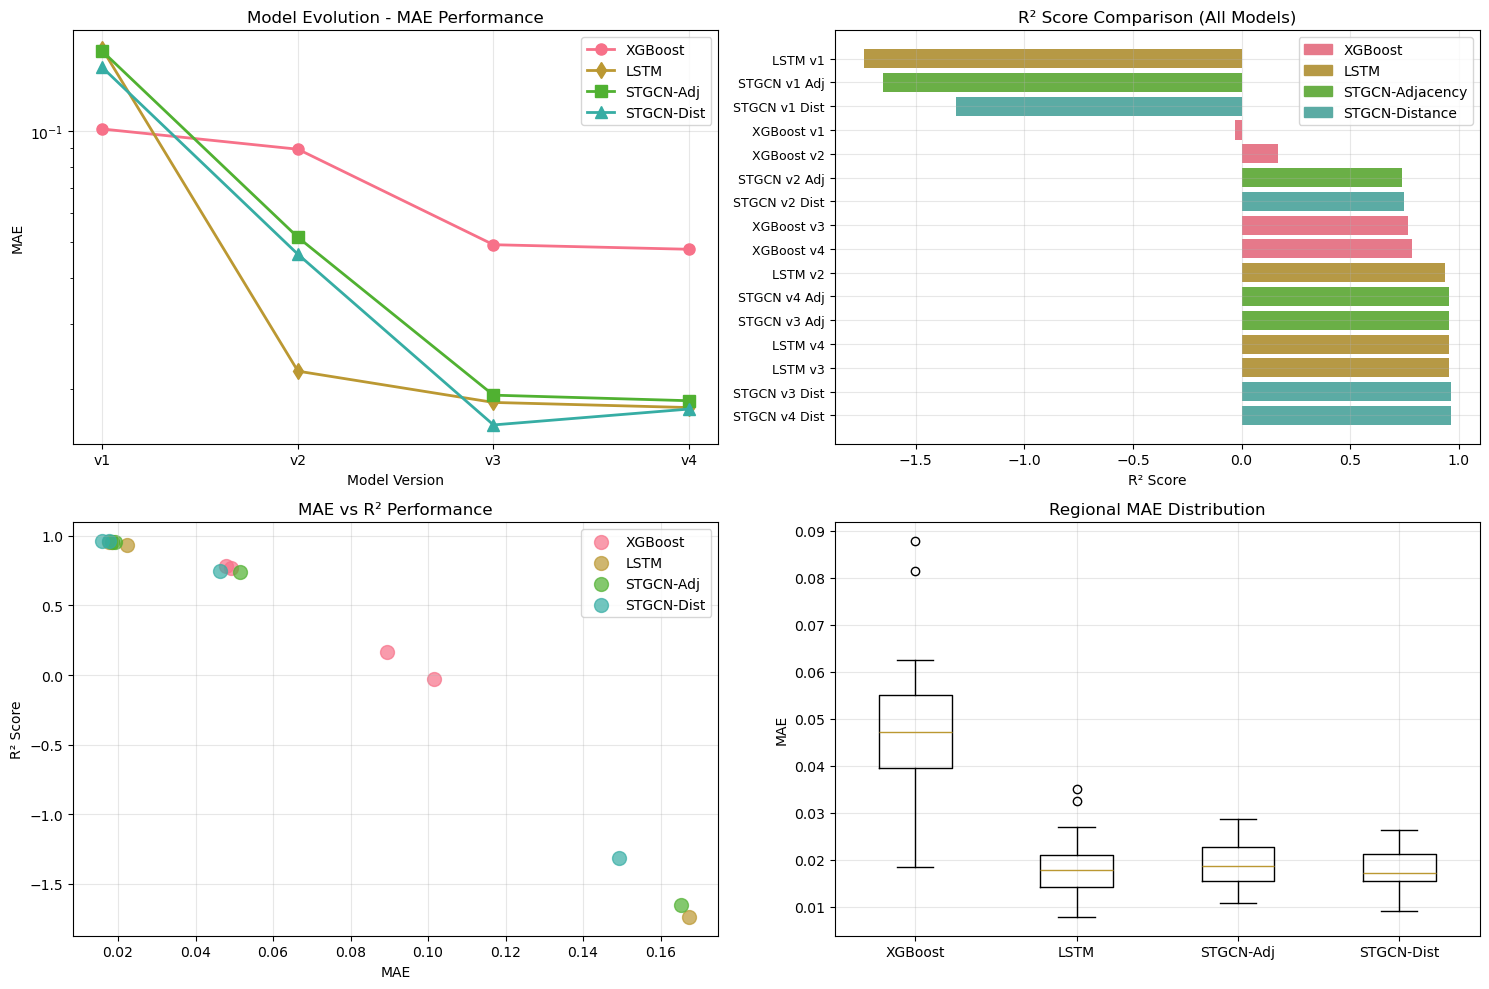


=== Performance Summary ===
Best XGBoost: XGBoost v4: + Socio-Economic (R² = 0.7836, MAE = 0.0479)
Best LSTM: LSTM v3: + Derived Features (R² = 0.9564, MAE = 0.0184)
Best STGCN-Adj: STGCN v3 Adj: + Derived Features (R² = 0.9548, MAE = 0.0192)
Best STGCN-Dist: STGCN v4 Dist: + Socio-Economic (R² = 0.9619, MAE = 0.0176)

Overall Best Model: STGCN v4 Dist: + Socio-Economic (R² = 0.9619, MAE = 0.0176)

STGCN-Dist vs XGBoost - MAE improvement: 63.2%, R² improvement: +0.1783
STGCN-Dist vs LSTM - MAE improvement: 4.1%, R² improvement: +0.0055
STGCN-Dist vs STGCN-Adj - MAE improvement: 8.3%, R² improvement: +0.0071

Results saved to: comprehensive_performance_summary.csv


In [3]:
##### Real-time Updated Comprehensive Analysis

def calculate_metrics(predictions_df):
    """Calculate model performance metrics"""
    actual = predictions_df['actual']
    predicted = predictions_df['predicted']
    
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    return {'MAE': mae, 'R²': r2, 'RMSE': rmse, 'MAPE': mape, 'samples': len(actual)}

# Auto-detect available results
print("Loading all available model results...")

xgb_results = {}
for file in os.listdir('../results/'):
    if file.startswith('xgboost_') and file.endswith('_predictions.csv'):
        version = file.replace('xgboost_', '').replace('_predictions.csv', '')
        
        # Auto-detect feature importance file
        importance_file = None
        for imp_file in os.listdir('../results/'):
            if f'xgboost_{version}' in imp_file and 'importance.csv' in imp_file:
                importance_file = f'../results/{imp_file}'
                break
        
        if importance_file and os.path.exists(importance_file):
            xgb_results[version] = {
                'predictions': pd.read_csv(f'../results/{file}'),
                'feature_importance': pd.read_csv(importance_file),
                'version': version
            }

lstm_results = {}
for file in os.listdir('../results/'):
    if file.startswith('lstm_') and file.endswith('_predictions.csv'):
        # Extract version from filename like lstm_version_1_predictions.csv
        parts = file.replace('lstm_', '').replace('_predictions.csv', '').split('_')
        if len(parts) >= 2 and parts[0] == 'version':
            version = f"version_{parts[1]}"
            lstm_results[version] = {
                'predictions': pd.read_csv(f'../results/{file}'),
                'version': version
            }

stgcn_results = {}
for file in os.listdir('../results/'):
    if file.startswith('stgcn_') and file.endswith('_predictions.csv'):
        parts = file.replace('stgcn_', '').replace('_predictions.csv', '').split('_')
        version = parts[0] + '_' + parts[1]
        graph_type = parts[2]
        
        key = f"{version}_{graph_type}"
        stgcn_results[key] = {
            'predictions': pd.read_csv(f'../results/{file}'),
            'version': version,
            'graph_type': graph_type
        }

print(f"Loaded {len(xgb_results)} XGBoost, {len(lstm_results)} LSTM, and {len(stgcn_results)} STGCN models")

# Calculate performance metrics
all_results = []

# XGBoost model names
xgb_names = {
    'version_1': 'XGBoost v1: Original Features',
    'version_2': 'XGBoost v2: + Infection Rates', 
    'version_3': 'XGBoost v3: + Derived Features',
    'version_4': 'XGBoost v4: + Socio-Economic'
}

for version, data in xgb_results.items():
    metrics = calculate_metrics(data['predictions'])
    metrics.update({
        'Model': xgb_names.get(version, f'XGBoost {version}'),
        'Type': 'XGBoost',
        'Version': version,
        'Graph_Type': 'N/A'
    })
    all_results.append(metrics)

# LSTM model names
lstm_names = {
    'version_1': 'LSTM v1: Original Features',
    'version_2': 'LSTM v2: + Infection Rates',
    'version_3': 'LSTM v3: + Derived Features',
    'version_4': 'LSTM v4: + Socio-Economic'
}

for version, data in lstm_results.items():
    metrics = calculate_metrics(data['predictions'])
    metrics.update({
        'Model': lstm_names.get(version, f'LSTM {version}'),
        'Type': 'LSTM',
        'Version': version,
        'Graph_Type': 'N/A'
    })
    all_results.append(metrics)

# STGCN model names
stgcn_names = {
    'version_1_adjacency': 'STGCN v1 Adj: Original Features',
    'version_1_distance': 'STGCN v1 Dist: Original Features',
    'version_2_adjacency': 'STGCN v2 Adj: + Infection Rates',
    'version_2_distance': 'STGCN v2 Dist: + Infection Rates',
    'version_3_adjacency': 'STGCN v3 Adj: + Derived Features',
    'version_3_distance': 'STGCN v3 Dist: + Derived Features',
    'version_4_adjacency': 'STGCN v4 Adj: + Socio-Economic',
    'version_4_distance': 'STGCN v4 Dist: + Socio-Economic'
}

for key, data in stgcn_results.items():
    metrics = calculate_metrics(data['predictions'])
    metrics.update({
        'Model': stgcn_names.get(key, f'STGCN {key}'),
        'Type': 'STGCN',
        'Version': data['version'],
        'Graph_Type': data['graph_type']
    })
    all_results.append(metrics)

# Create comprehensive results table
results_df = pd.DataFrame(all_results)

print("\n=== Model Performance Comparison ===")
display_cols = ['Model', 'Type', 'Version', 'Graph_Type', 'MAE', 'R²', 'RMSE', 'MAPE', 'samples']
print(results_df[display_cols].round(4).to_string(index=False))

# Regional Performance Analysis
def analyze_regional_performance(results_dict, model_name):
    """Analyze prediction performance by CIS region"""
    regional_stats = []
    
    for key, result in results_dict.items():
        predictions = result['predictions']
        
        regional_perf = predictions.groupby('cis_code').agg({
            'actual': ['mean', 'std'],
            'predicted': ['mean', 'std'],
            'residual': ['mean', 'std', lambda x: np.sqrt(np.mean(x**2))]
        }).round(4)
        
        regional_perf.columns = ['actual_mean', 'actual_std', 'pred_mean', 'pred_std', 
                               'residual_mean', 'residual_std', 'rmse']
        regional_perf['mae'] = predictions.groupby('cis_code')['residual'].apply(lambda x: np.abs(x).mean())
        regional_perf['model'] = result.get('name', model_name)
        regional_perf['cis_code'] = regional_perf.index
        
        regional_stats.append(regional_perf.reset_index(drop=True))
    
    return pd.concat(regional_stats, ignore_index=True) if regional_stats else pd.DataFrame()

# Find best models (including both STGCN graph types)
best_xgb = results_df[results_df['Type'] == 'XGBoost'].loc[results_df[results_df['Type'] == 'XGBoost']['R²'].idxmax()] if len(results_df[results_df['Type'] == 'XGBoost']) > 0 else None
best_lstm = results_df[results_df['Type'] == 'LSTM'].loc[results_df[results_df['Type'] == 'LSTM']['R²'].idxmax()] if len(results_df[results_df['Type'] == 'LSTM']) > 0 else None
best_stgcn_adj = results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'adjacency')].loc[results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'adjacency')]['R²'].idxmax()] if len(results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'adjacency')]) > 0 else None
best_stgcn_dist = results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'distance')].loc[results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'distance')]['R²'].idxmax()] if len(results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'distance')]) > 0 else None

print("\n=== Regional Performance Analysis ===")
if best_xgb is not None:
    # XGBoost regional analysis
    xgb_key = best_xgb['Version']
    if xgb_key in xgb_results:
        xgb_regional = analyze_regional_performance({xgb_key: xgb_results[xgb_key]}, best_xgb['Model'])
        if len(xgb_regional) > 0:
            print(f"{best_xgb['Model']} - Regional MAE: {xgb_regional['mae'].mean():.4f} ± {xgb_regional['mae'].std():.4f}")

if best_lstm is not None:
    # LSTM regional analysis
    lstm_key = best_lstm['Version']
    if lstm_key in lstm_results:
        lstm_regional = analyze_regional_performance({lstm_key: lstm_results[lstm_key]}, best_lstm['Model'])
        if len(lstm_regional) > 0:
            print(f"{best_lstm['Model']} - Regional MAE: {lstm_regional['mae'].mean():.4f} ± {lstm_regional['mae'].std():.4f}")

if best_stgcn_adj is not None:
    # STGCN Adjacency regional analysis  
    stgcn_adj_key = f"{best_stgcn_adj['Version']}_{best_stgcn_adj['Graph_Type']}"
    if stgcn_adj_key in stgcn_results:
        stgcn_adj_regional = analyze_regional_performance({stgcn_adj_key: stgcn_results[stgcn_adj_key]}, best_stgcn_adj['Model'])
        if len(stgcn_adj_regional) > 0:
            print(f"{best_stgcn_adj['Model']} - Regional MAE: {stgcn_adj_regional['mae'].mean():.4f} ± {stgcn_adj_regional['mae'].std():.4f}")

if best_stgcn_dist is not None:
    # STGCN Distance regional analysis  
    stgcn_dist_key = f"{best_stgcn_dist['Version']}_{best_stgcn_dist['Graph_Type']}"
    if stgcn_dist_key in stgcn_results:
        stgcn_dist_regional = analyze_regional_performance({stgcn_dist_key: stgcn_results[stgcn_dist_key]}, best_stgcn_dist['Model'])
        if len(stgcn_dist_regional) > 0:
            print(f"{best_stgcn_dist['Model']} - Regional MAE: {stgcn_dist_regional['mae'].mean():.4f} ± {stgcn_dist_regional['mae'].std():.4f}")

# Statistical Significance Testing - All pairwise comparisons
print("\n=== Statistical Significance Testing ===")

# Define best models for comparison
best_models = []
best_models_data = []

if best_xgb is not None:
    xgb_version = best_xgb['Version']
    if xgb_version in xgb_results:
        version_num = xgb_version.split('_')[1]
        best_models.append((f'XGBoost v{version_num}', best_xgb['Model'], xgb_results[xgb_version]['predictions']))
        best_models_data.append(best_xgb)

if best_lstm is not None:
    lstm_version = best_lstm['Version']
    if lstm_version in lstm_results:
        version_num = lstm_version.split('_')[1]
        best_models.append((f'LSTM v{version_num}', best_lstm['Model'], lstm_results[lstm_version]['predictions']))
        best_models_data.append(best_lstm)

if best_stgcn_adj is not None:
    stgcn_adj_key = f"{best_stgcn_adj['Version']}_{best_stgcn_adj['Graph_Type']}"
    if stgcn_adj_key in stgcn_results:
        version_num = best_stgcn_adj['Version'].split('_')[1]
        best_models.append((f'STGCN v{version_num}-Adj', best_stgcn_adj['Model'], stgcn_results[stgcn_adj_key]['predictions']))
        best_models_data.append(best_stgcn_adj)

if best_stgcn_dist is not None:
    stgcn_dist_key = f"{best_stgcn_dist['Version']}_{best_stgcn_dist['Graph_Type']}"
    if stgcn_dist_key in stgcn_results:
        version_num = best_stgcn_dist['Version'].split('_')[1]
        best_models.append((f'STGCN v{version_num}-Dist', best_stgcn_dist['Model'], stgcn_results[stgcn_dist_key]['predictions']))
        best_models_data.append(best_stgcn_dist)

# Perform pairwise statistical comparisons
statistical_results = []

for i in range(len(best_models)):
    for j in range(i+1, len(best_models)):
        model1_type, model1_name, model1_pred = best_models[i]
        model2_type, model2_name, model2_pred = best_models[j]
        
        # Merge predictions for comparison
        merged = pd.merge(model1_pred[['date', 'cis_code', 'actual', 'predicted']], 
                         model2_pred[['date', 'cis_code', 'predicted']], 
                         on=['date', 'cis_code'], suffixes=('_model1', '_model2'))
        
        if len(merged) > 0:
            residuals_model1 = np.abs(merged['actual'] - merged['predicted_model1'])
            residuals_model2 = np.abs(merged['actual'] - merged['predicted_model2'])
            
            # Perform statistical tests
            t_stat, p_value = stats.ttest_rel(residuals_model1, residuals_model2)
            w_stat, w_p_value = stats.wilcoxon(residuals_model1, residuals_model2)
            
            mae_diff = residuals_model1.mean() - residuals_model2.mean()
            mae_model1 = residuals_model1.mean()
            mae_model2 = residuals_model2.mean()
            relative_improvement = (mae_diff / mae_model1) * 100 if mae_model1 > 0 else 0
            
            # Store results
            statistical_results.append({
                'Model1': model1_type,
                'Model2': model2_type,
                'Model1_Name': model1_name,
                'Model2_Name': model2_name,
                'MAE_Diff': mae_diff,
                'Relative_Improvement_%': relative_improvement,
                'T_test_p': p_value,
                'Wilcoxon_p': w_p_value,
                'Significant': p_value < 0.05
            })
            
            print(f"\nComparison: {model1_type} vs {model2_type}")
            print(f"MAE Difference: {mae_diff:.4f} (negative means {model2_type} is better)")
            print(f"Relative Improvement: {abs(relative_improvement):.1f}%")
            print(f"T-test p-value: {p_value:.6f}")
            print(f"Wilcoxon p-value: {w_p_value:.6f}")
            print(f"Statistically significant at α=0.05: {p_value < 0.05}")

# Create statistical results DataFrame
if statistical_results:
    stats_df = pd.DataFrame(statistical_results)
    stats_df.to_csv('../results/statistical_significance_tests.csv', index=False)
    print(f"\nStatistical test results saved to: statistical_significance_tests.csv")

# Comprehensive Visualizations
print("\n=== Generating Visualizations ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Performance Evolution
version_order = ['version_1', 'version_2', 'version_3', 'version_4']
xgb_evolution = []
lstm_evolution = []
stgcn_adj_evolution = []
stgcn_dist_evolution = []

for version in version_order:
    # XGBoost
    xgb_row = results_df[(results_df['Type'] == 'XGBoost') & (results_df['Version'] == version)]
    if len(xgb_row) > 0:
        xgb_evolution.append(xgb_row.iloc[0]['MAE'])
    else:
        xgb_evolution.append(np.nan)
    
    # LSTM
    lstm_row = results_df[(results_df['Type'] == 'LSTM') & (results_df['Version'] == version)]
    if len(lstm_row) > 0:
        lstm_evolution.append(lstm_row.iloc[0]['MAE'])
    else:
        lstm_evolution.append(np.nan)
    
    # STGCN Adjacency
    stgcn_adj_row = results_df[(results_df['Type'] == 'STGCN') & (results_df['Version'] == version) & (results_df['Graph_Type'] == 'adjacency')]
    if len(stgcn_adj_row) > 0:
        stgcn_adj_evolution.append(stgcn_adj_row.iloc[0]['MAE'])
    else:
        stgcn_adj_evolution.append(np.nan)
    
    # STGCN Distance
    stgcn_dist_row = results_df[(results_df['Type'] == 'STGCN') & (results_df['Version'] == version) & (results_df['Graph_Type'] == 'distance')]
    if len(stgcn_dist_row) > 0:
        stgcn_dist_evolution.append(stgcn_dist_row.iloc[0]['MAE'])
    else:
        stgcn_dist_evolution.append(np.nan)

versions_label = ['v1', 'v2', 'v3', 'v4']
axes[0, 0].plot(versions_label, xgb_evolution, 'o-', label='XGBoost', linewidth=2, markersize=8)
axes[0, 0].plot(versions_label, lstm_evolution, 'd-', label='LSTM', linewidth=2, markersize=8)
axes[0, 0].plot(versions_label, stgcn_adj_evolution, 's-', label='STGCN-Adj', linewidth=2, markersize=8)
axes[0, 0].plot(versions_label, stgcn_dist_evolution, '^-', label='STGCN-Dist', linewidth=2, markersize=8)
axes[0, 0].set_title('Model Evolution - MAE Performance')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_xlabel('Model Version')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# 2. R² Comparison - Sort by performance (high to low)
results_sorted = results_df.sort_values('R²', ascending=False)  # Sort from high to low
x_pos = np.arange(len(results_sorted))

# Define detailed colors for each model type
detailed_colors = {'XGBoost': '#e6798a', 'LSTM': '#b69945', 'STGCN-Adjacency': '#6aaf46', 'STGCN-Distance': '#5baba4'}

# Map each model to its specific color
model_colors = []
for _, row in results_sorted.iterrows():
    if row['Type'] == 'XGBoost':
        model_colors.append(detailed_colors['XGBoost'])
    elif row['Type'] == 'LSTM':
        model_colors.append(detailed_colors['LSTM'])
    elif row['Type'] == 'STGCN':
        if row['Graph_Type'] == 'adjacency':
            model_colors.append(detailed_colors['STGCN-Adjacency'])
        else:
            model_colors.append(detailed_colors['STGCN-Distance'])

axes[0, 1].barh(x_pos, results_sorted['R²'], color=model_colors)
axes[0, 1].set_yticks(x_pos)
axes[0, 1].set_yticklabels([name.split(':')[0] for name in results_sorted['Model']], fontsize=9)
axes[0, 1].set_title('R² Score Comparison (All Models)')
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].grid(True, alpha=0.3)

# Add legend for all model types (top right)
legend_labels = ['XGBoost', 'LSTM', 'STGCN-Adjacency', 'STGCN-Distance']
legend_colors = [detailed_colors[label] for label in legend_labels]
handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
axes[0, 1].legend(handles, legend_labels, loc='upper right')

# 3. MAE vs R² Scatter
for model_type in ['XGBoost', 'LSTM']:
    subset = results_df[results_df['Type'] == model_type]
    axes[1, 0].scatter(subset['MAE'], subset['R²'], 
                      label=model_type, alpha=0.7, s=100)

# STGCN separated by graph type
stgcn_adj_subset = results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'adjacency')]
stgcn_dist_subset = results_df[(results_df['Type'] == 'STGCN') & (results_df['Graph_Type'] == 'distance')]
if len(stgcn_adj_subset) > 0:
    axes[1, 0].scatter(stgcn_adj_subset['MAE'], stgcn_adj_subset['R²'], 
                      label='STGCN-Adj', alpha=0.7, s=100)
if len(stgcn_dist_subset) > 0:
    axes[1, 0].scatter(stgcn_dist_subset['MAE'], stgcn_dist_subset['R²'], 
                      label='STGCN-Dist', alpha=0.7, s=100)

axes[1, 0].set_xlabel('MAE')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('MAE vs R² Performance')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Regional stability comparison (if data available)
regional_data = []
regional_labels = []

# Check for available regional data
if 'xgb_regional' in locals() and len(xgb_regional) > 0:
    regional_data.append(xgb_regional['mae'])
    regional_labels.append('XGBoost')

if 'lstm_regional' in locals() and len(lstm_regional) > 0:
    regional_data.append(lstm_regional['mae'])
    regional_labels.append('LSTM')
    
if 'stgcn_adj_regional' in locals() and len(stgcn_adj_regional) > 0:
    regional_data.append(stgcn_adj_regional['mae'])
    regional_labels.append('STGCN-Adj')

if 'stgcn_dist_regional' in locals() and len(stgcn_dist_regional) > 0:
    regional_data.append(stgcn_dist_regional['mae'])
    regional_labels.append('STGCN-Dist')

if len(regional_data) >= 2:
    axes[1, 1].boxplot(regional_data, labels=regional_labels)
    axes[1, 1].set_title('Regional MAE Distribution')
    axes[1, 1].set_ylabel('MAE')
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Final metrics comparison
    best_models_list = [m for m in [best_xgb, best_lstm, best_stgcn_adj, best_stgcn_dist] if m is not None]
    if len(best_models_list) >= 2:
        metrics = ['MAE', 'R²', 'RMSE', 'MAPE']
        
        x = np.arange(len(metrics))
        width = 0.2
        
        colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
        for i, model in enumerate(best_models_list):
            vals = [model[m] for m in metrics]
            axes[1, 1].bar(x + (i-2)*width, vals, width, 
                          label=model['Type'] + ('-Adj' if model.get('Graph_Type') == 'adjacency' else '-Dist' if model.get('Graph_Type') == 'distance' else ''), 
                          alpha=0.8, color=colors[i])
        
        axes[1, 1].set_xlabel('Metrics')
        axes[1, 1].set_ylabel('Values')
        axes[1, 1].set_title('Best Models Comparison')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(metrics)
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/comprehensive_analysis_current.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print(f"\n=== Performance Summary ===")
if best_xgb is not None:
    print(f"Best XGBoost: {best_xgb['Model']} (R² = {best_xgb['R²']:.4f}, MAE = {best_xgb['MAE']:.4f})")
if best_lstm is not None:
    print(f"Best LSTM: {best_lstm['Model']} (R² = {best_lstm['R²']:.4f}, MAE = {best_lstm['MAE']:.4f})")
if best_stgcn_adj is not None:
    print(f"Best STGCN-Adj: {best_stgcn_adj['Model']} (R² = {best_stgcn_adj['R²']:.4f}, MAE = {best_stgcn_adj['MAE']:.4f})")
if best_stgcn_dist is not None:
    print(f"Best STGCN-Dist: {best_stgcn_dist['Model']} (R² = {best_stgcn_dist['R²']:.4f}, MAE = {best_stgcn_dist['MAE']:.4f})")

# Overall best model comparison
best_overall = results_df.loc[results_df['R²'].idxmax()]
print(f"\nOverall Best Model: {best_overall['Model']} (R² = {best_overall['R²']:.4f}, MAE = {best_overall['MAE']:.4f})")

# Performance improvement calculations
if best_xgb is not None and best_stgcn_dist is not None:
    mae_improvement = ((best_xgb['MAE'] - best_stgcn_dist['MAE']) / best_xgb['MAE']) * 100
    r2_improvement = best_stgcn_dist['R²'] - best_xgb['R²']
    print(f"\nSTGCN-Dist vs XGBoost - MAE improvement: {mae_improvement:.1f}%, R² improvement: +{r2_improvement:.4f}")

if best_lstm is not None and best_stgcn_dist is not None:
    mae_improvement_lstm = ((best_lstm['MAE'] - best_stgcn_dist['MAE']) / best_lstm['MAE']) * 100
    r2_improvement_lstm = best_stgcn_dist['R²'] - best_lstm['R²']
    print(f"STGCN-Dist vs LSTM - MAE improvement: {mae_improvement_lstm:.1f}%, R² improvement: +{r2_improvement_lstm:.4f}")

if best_stgcn_adj is not None and best_stgcn_dist is not None:
    mae_improvement_stgcn = ((best_stgcn_adj['MAE'] - best_stgcn_dist['MAE']) / best_stgcn_adj['MAE']) * 100
    r2_improvement_stgcn = best_stgcn_dist['R²'] - best_stgcn_adj['R²']
    print(f"STGCN-Dist vs STGCN-Adj - MAE improvement: {mae_improvement_stgcn:.1f}%, R² improvement: +{r2_improvement_stgcn:.4f}")

# Save results
results_df.to_csv('../results/comprehensive_performance_summary.csv', index=False)
print(f"\nResults saved to: comprehensive_performance_summary.csv")


Temporal Evolution Analysis...
Temporal evolution data preparation completed...
Analysis time range: 2020-12-27 00:00:00 to 2021-02-10 00:00:00
Total 104 data points


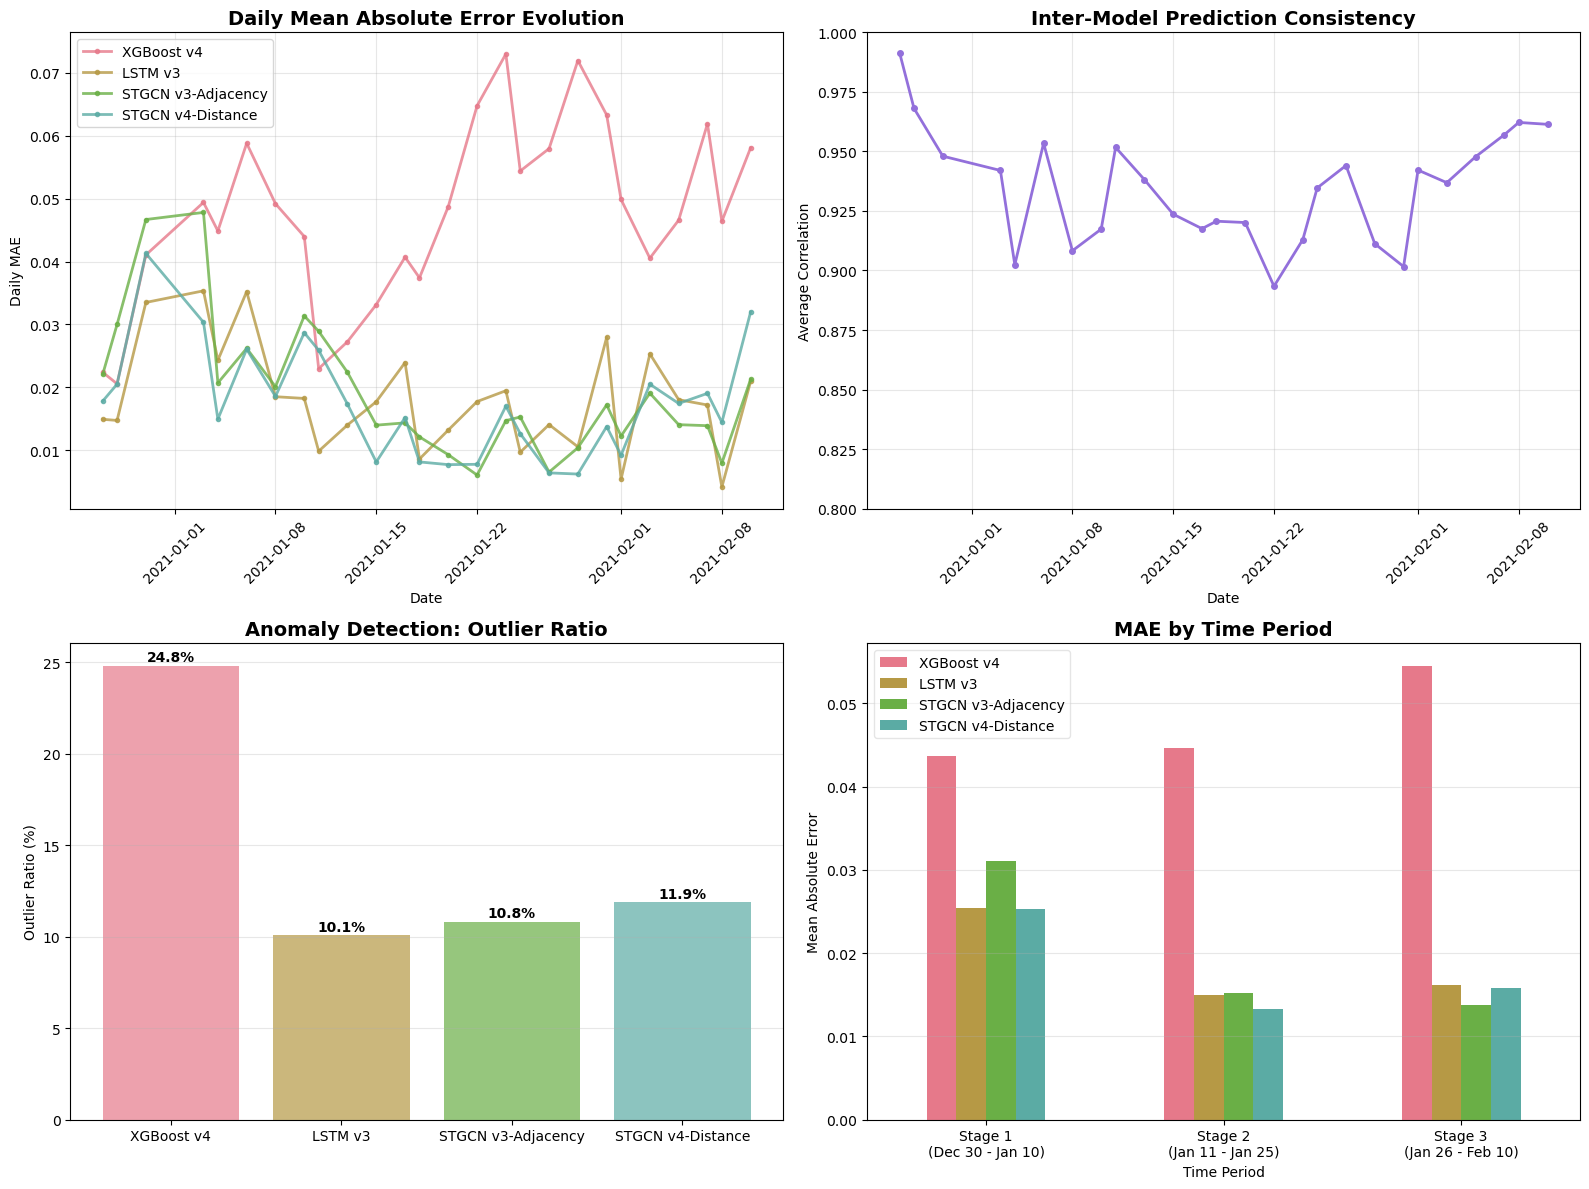


=== Temporal Evolution Analysis Results ===

1. Outlier Ratios:
  XGBoost v4: 24.8%
  LSTM v3: 10.1%
  STGCN v3-Adjacency: 10.8%
  STGCN v4-Distance: 11.9%

2. Average Inter-Model Correlation: 0.935

3. Time Period Average Errors:
model                       XGBoost v4  LSTM v3  STGCN v3-Adjacency  \
time_stage                                                            
Stage 1\n(Dec 30 - Jan 10)      0.0437   0.0254              0.0310   
Stage 2\n(Jan 11 - Jan 25)      0.0447   0.0150              0.0153   
Stage 3\n(Jan 26 - Feb 10)      0.0545   0.0162              0.0138   

model                       STGCN v4-Distance  
time_stage                                     
Stage 1\n(Dec 30 - Jan 10)             0.0253  
Stage 2\n(Jan 11 - Jan 25)             0.0133  
Stage 3\n(Jan 26 - Feb 10)             0.0158  

4. Overall Time Period Performance:
  LSTM v3: MAE = 0.0184
  STGCN v3-Adjacency: MAE = 0.0192
  STGCN v4-Distance: MAE = 0.0176
  XGBoost v4: MAE = 0.0479


In [4]:
##### Temporal Evolution Analysis
print("\nTemporal Evolution Analysis...")

# Load prediction results from best models
stgcn_distance_data = pd.read_csv('../results/stgcn_version_4_distance_all_features_derived_predictions.csv')
stgcn_adjacency_data = pd.read_csv('../results/stgcn_version_3_adjacency_infection_rates_derived_predictions.csv')
lstm_data = pd.read_csv('../results/lstm_version_3_predictions.csv')
xgboost_data = pd.read_csv('../results/xgboost_version_4_predictions.csv')

# Add model type identifiers
stgcn_distance_data['model'] = 'STGCN v4-Distance'
stgcn_adjacency_data['model'] = 'STGCN v3-Adjacency'
lstm_data['model'] = 'LSTM v3'
xgboost_data['model'] = 'XGBoost v4'

# Combine all data
all_temporal_data = pd.concat([stgcn_distance_data, stgcn_adjacency_data, lstm_data, xgboost_data], ignore_index=True)

# Convert date format
all_temporal_data['date'] = pd.to_datetime(all_temporal_data['date'])

# Calculate daily average errors by date and model
daily_errors = all_temporal_data.groupby(['date', 'model']).agg({
    'residual': ['mean', 'std', 'count'],
    'actual': 'mean',
    'predicted': 'mean'
}).round(4)

daily_errors.columns = ['mae_daily', 'std_daily', 'count', 'actual_mean', 'predicted_mean']
daily_errors = daily_errors.reset_index()

# Calculate daily average absolute residuals
all_temporal_data['abs_residual'] = np.abs(all_temporal_data['residual'])
daily_abs_errors = all_temporal_data.groupby(['date', 'model'])['abs_residual'].mean().reset_index()
daily_errors = daily_errors.merge(daily_abs_errors, on=['date', 'model'])

print("Temporal evolution data preparation completed...")
print(f"Analysis time range: {daily_errors['date'].min()} to {daily_errors['date'].max()}")
print(f"Total {len(daily_errors)} data points")

# Create temporal evolution analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Daily MAE Evolution
ax = axes[0, 0]
colors = {'XGBoost v4': '#e6798a', 'LSTM v3': '#b69945', 'STGCN v3-Adjacency': '#6aaf46', 'STGCN v4-Distance': '#5baba4'}
for model in ['XGBoost v4', 'LSTM v3', 'STGCN v3-Adjacency', 'STGCN v4-Distance']:
    model_data = daily_errors[daily_errors['model'] == model]
    ax.plot(model_data['date'], model_data['abs_residual'], 
            label=model, color=colors[model], marker='o', markersize=3, alpha=0.8, linewidth=2)

ax.set_title('Daily Mean Absolute Error Evolution', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Daily MAE')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# 2. Prediction Consistency Analysis
ax = axes[0, 1]
# Calculate daily inter-model prediction correlations
pivot_pred = all_temporal_data.pivot_table(values='predicted', 
                                          index=['date', 'cis_code'], 
                                          columns='model').reset_index()

daily_correlation = []
for date in pivot_pred['date'].unique():
    date_data = pivot_pred[pivot_pred['date'] == date]
    if len(date_data) > 10:  # Ensure sufficient samples
        corr_matrix = date_data[['STGCN v4-Distance', 'STGCN v3-Adjacency', 'LSTM v3', 'XGBoost v4']].corr()
        # Take average of upper triangular correlation coefficients
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        mean_corr = upper_tri.stack().mean()
        daily_correlation.append({'date': date, 'correlation': mean_corr})

daily_correlation = pd.DataFrame(daily_correlation)
ax.plot(daily_correlation['date'], daily_correlation['correlation'], 
        color='mediumpurple', marker='o', markersize=4, linewidth=2)
ax.set_title('Inter-Model Prediction Consistency', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Average Correlation')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0.8, 1.0)

# 3. Anomaly Detection Analysis
ax = axes[1, 0]
# Calculate outlier ratio for each model (exceeding 2 standard deviations)
anomaly_data = []
for model in ['XGBoost v4', 'LSTM v3', 'STGCN v3-Adjacency', 'STGCN v4-Distance']:
    model_subset = all_temporal_data[all_temporal_data['model'] == model]
    threshold = 2 * model_subset['abs_residual'].std()
    anomaly_count = (model_subset['abs_residual'] > threshold).sum()
    total_count = len(model_subset)
    anomaly_ratio = anomaly_count / total_count * 100
    anomaly_data.append({'model': model, 'anomaly_ratio': anomaly_ratio})

anomaly_df = pd.DataFrame(anomaly_data)
bars = ax.bar(anomaly_df['model'], anomaly_df['anomaly_ratio'], 
              color=[colors[model] for model in anomaly_df['model']], alpha=0.7)
ax.set_title('Anomaly Detection: Outlier Ratio', fontsize=14, fontweight='bold')
ax.set_ylabel('Outlier Ratio (%)')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, ratio in zip(bars, anomaly_df['anomaly_ratio']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
            f'{ratio:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Time Period Error Comparison
ax = axes[1, 1]
# Define objective time periods (avoiding subjective epidemic descriptions)
def get_time_stage(date):
    if date <= pd.to_datetime('2021-01-10'):
        return 'Stage 1\n(Dec 30 - Jan 10)'
    elif date <= pd.to_datetime('2021-01-25'):
        return 'Stage 2\n(Jan 11 - Jan 25)'
    else:
        return 'Stage 3\n(Jan 26 - Feb 10)'

all_temporal_data['time_stage'] = all_temporal_data['date'].apply(get_time_stage)

# Calculate average error for each stage
stage_errors = all_temporal_data.groupby(['time_stage', 'model'])['abs_residual'].mean().unstack()

# Ensure correct stage order
stage_order = ['Stage 1\n(Dec 30 - Jan 10)', 'Stage 2\n(Jan 11 - Jan 25)', 'Stage 3\n(Jan 26 - Feb 10)']
stage_errors = stage_errors.reindex(stage_order)

# Reorder columns to match desired model order
model_order = ['XGBoost v4', 'LSTM v3', 'STGCN v3-Adjacency', 'STGCN v4-Distance']
stage_errors = stage_errors[model_order]

stage_errors.plot(kind='bar', ax=ax, color=[colors[col] for col in stage_errors.columns])
ax.set_title('MAE by Time Period', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Time Period')
ax.legend(loc='upper left', framealpha=0.5)
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(axis='x', rotation=0)  # No rotation due to line breaks

plt.tight_layout()
plt.savefig('../results/temporal_evolution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Output statistical results
print("\n=== Temporal Evolution Analysis Results ===")
print("\n1. Outlier Ratios:")
for _, row in anomaly_df.iterrows():
    print(f"  {row['model']}: {row['anomaly_ratio']:.1f}%")

print(f"\n2. Average Inter-Model Correlation: {daily_correlation['correlation'].mean():.3f}")

print("\n3. Time Period Average Errors:")
print(stage_errors.round(4))

print("\n4. Overall Time Period Performance:")
overall_mae = all_temporal_data.groupby('model')['abs_residual'].mean()
for model, mae in overall_mae.items():
    print(f"  {model}: MAE = {mae:.4f}")
